In [8]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

**Simulate Stock Price**

In [18]:
np.random.seed(0)
S0 = 100
mu = 0.07
sigma = 0.2
T = 10
dt = 1/12
N = int(T / dt)
dates = pd.date_range(start='2013-01-01', periods=N, freq='M')

# Initial stock price
prices = np.zeros(N)
prices[0] = S0

# Simulate stock price using GBM
for t in range(1, N):
    Z = np.random.normal()  # Standard normal variables
    prices[t] = prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Dataframe
data = pd.DataFrame({
    'Date': dates,
    'Close': prices
})

**Plot Graph**

In [23]:
data['Date'] = pd.to_datetime(data['Date'])

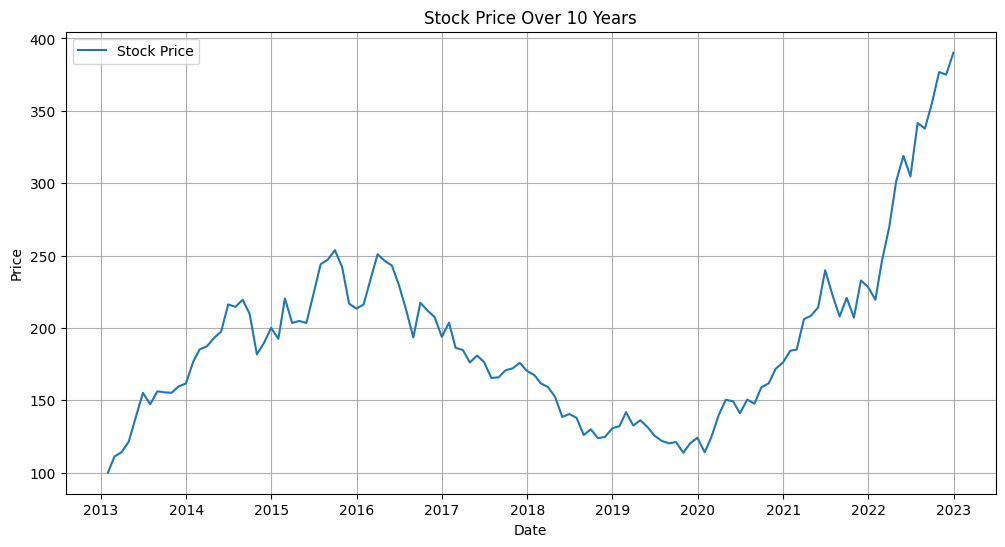

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Stock Price')

# Tùy chỉnh trục x để chỉ hiển thị các năm
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.show()

**Option Pricing**

In [30]:
# Black Scholes Option Pricing function
def BlackScholes(K, S0, r, annual_vol, T, div, opttype = 'C'):
  d1 = (np.log(S0 / K) + (r + sigma**2 / 2)*T) / (sigma * np.sqrt(T))
  d2 = d1 - (sigma * np.sqrt(T))
  if opttype == 'C':
    price = S0 *  norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0, 1)
  elif opttype == 'P':
    price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S0 * norm.cdf(-d1, 0 ,1)

  # Compute Greeks
  ## Delta: Option Price wrt Asset Price
  if opttype == 'C':
    delta = np.exp(-div * T) * norm.cdf(d1, 0 ,1)
  elif opttype == 'P':
    delta = - np.exp(-div * T) * norm.cdf(-d1, 0 ,1)

  ## Gamma: Delta wrt Asset Price
  gamma = (np.exp(-div * T) * norm.cdf(d1, 0 ,1)) / (S0 * sigma * np.sqrt(T))

  ## Vega: Option Price wrt Volatility
  vega = (S0 * np.exp(-div * T) * norm.cdf(d1, 0 ,1)) / (S0 * sigma * np.sqrt(T))

  ## Theta: Option Price wrt Maturity Time
  if opttype == 'C':
    theta = (div * S0 * np.exp(-div * T) * norm.cdf(d1, 0 ,1) - r * K * np.exp(-r * T) * norm.cdf(d2, 0 ,1) - K * np.exp(-r * T) * norm.pdf(d2, 0 ,1) * (sigma / (2*np.sqrt(T)))) * (1/365)
  elif opttype == 'P':
    theta = (- div * S0 * np.exp(-div * T) * norm.cdf(-d1, 0 ,1) + r * K * np.exp(-r * T) * norm.cdf(-d2, 0 ,1) - K * np.exp(-r * T) * norm.pdf(d2, 0 ,1) * (sigma / (2*np.sqrt(T)))) * (1/365)

  ## Rho: Option Price wrt Force of interest rate.
  if opttype == 'C':
    rho = (T * K * np.exp(-r * T) * norm.cdf(d2, 0, 1)) / 100
  elif opttype == 'P':
    rho = (- T * K * np.exp(-r * T) * norm.cdf(- d2, 0, 1)) / 100

  ## Psi:
  if opttype == 'C':
    psi = (-T * S0 * np.exp(-div * T) * norm.cdf(d1, 0, 1)) / 100
  elif opttype == 'P':
    psi = (T * S0 * np.exp(-div * T) * norm.cdf(-d1, 0, 1)) / 100

  return price, delta, gamma, vega, theta, rho, psi

In [32]:
# Call Options
S0 = 100
K = 110
div = 0
sigma = 0.2
T = 1
r = 0.08
call_prices, delta, gamma, vega, theta, rho, psi = BlackScholes(K, S0, r, sigma, T, div, opttype = 'C')
print(f"Call Price: {call_prices:.2f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")
print(f"Rho: {rho:.4f}")
print(f"Psi: {psi:.4f}")

Call Price: 7.28
Delta: 0.5094
Gamma: 0.0255
Vega: 2.5468
Theta: -0.0205
Rho: 0.4366
Psi: -0.5094


**Put Option**

In [35]:
# Call Options
S0 = 100
K = 110
div = 0
sigma = 0.2
T = 1
r = 0.08
put_prices, delta, gamma, vega, theta, rho, psi = BlackScholes(K, S0, r, sigma, T, div, opttype = 'P')
print(f"Put Price: {put_prices:.2f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")
print(f"Rho: {rho:.4f}")
print(f"Psi: {psi:.4f}")

Put Price: 8.82
Delta: -0.4906
Gamma: 0.0255
Vega: 2.5468
Theta: 0.0018
Rho: -0.5789
Psi: 0.4906
